# Market Basket Analysis on Telecom Product Data

## Research Question

#### _"What top related products/product groupings are items of interest for customers that we can incentivize by discounting to entice more customer purchases and reduce customer churn?"_

### Show Python Version

In [1]:
import sys
sys.version_info

sys.version_info(major=3, minor=8, micro=8, releaselevel='final', serial=0)

### Import necessary libraries/packages

In [2]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from numpy import random
from matplotlib import pyplot as plt
import seaborn as sns

### Set random seed for reproducable results

In [3]:
random.seed(1234)

### Read csv file into a pandas dataframe, drop any rows with all NaN values, and create an array from the DF

In [4]:
url = "C:/Users/tedda/Desktop/Data Science Portfolio/Machine Learning/Unsupervised Learning/Association/Market Basket Analysis on Telecom Product Data/Raw Datasets/teleco_market_basket.csv"
teleco_mb = pd.read_csv(url)
teleco_mb = teleco_mb.dropna(axis = 0, how ='all')
transactions = np.array(teleco_mb)

### Example of one transaction in the dataset (pre-encoding)

In [5]:
transactions[0]

array(['Logitech M510 Wireless mouse', 'HP 63 Ink', 'HP 65 ink',
       'nonda USB C to USB Adapter', '10ft iPHone Charger Cable',
       'HP 902XL ink', 'Creative Pebble 2.0 Speakers',
       'Cleaning Gel Universal Dust Cleaner',
       'Micro Center 32GB Memory card',
       'YUNSONG 3pack 6ft Nylon Lightning Cable',
       'TopMate C5 Laptop Cooler pad', 'Apple USB-C Charger cable',
       'HyperX Cloud Stinger Headset', 'TONOR USB Gaming Microphone',
       'Dust-Off Compressed Gas 2 pack', '3A USB Type C Cable 3 pack 6FT',
       'HOVAMP iPhone charger', 'SanDisk Ultra 128GB card',
       'FEEL2NICE 5 pack 10ft Lighning cable',
       'FEIYOLD Blue light Blocking Glasses'], dtype=object)

### Onehot encode the array by using TransactionEncoder()

In [6]:
encoder = TransactionEncoder()
onehot = encoder.fit_transform(transactions.astype(str))
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
onehot.drop('nan', axis = 1, inplace = True)
print(onehot.shape)
onehot.head()

(7501, 119)


,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,hP 65 Tri-color ink,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Export the encoded dataset used for Market Basket Analysis

In [7]:
onehot.to_csv("C:/Users/tedda/Desktop/Data Science Portfolio/Machine Learning/Unsupervised Learning/Association/Market Basket Analysis on Telecom Product Data/Cleansed Datasets/encoded_dataset.csv", header = True)

### Generate the frequent itemsets by using the Apriori Algorithm

In [8]:
frequent_itemsets = apriori(onehot, min_support = 0.01,
                            max_len = 4, use_colnames = True)

### Generate the Association Rules of the frequent itemsets found by the Apriori Algorithm with no threshold

In [9]:
rules = association_rules(frequent_itemsets,
                         metric = 'support',
                         min_threshold = 0.0)
print(rules.shape)
rules

(432, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Dust-Off Compressed Gas 2 pack),(10ft iPHone Charger Cable 2 Pack),0.238368,0.050527,0.023064,0.096756,1.914955,0.011020,1.051182
1,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255
2,(10ft iPHone Charger Cable 2 Pack),(HP 61 ink),0.050527,0.163845,0.010132,0.200528,1.223888,0.001853,1.045884
3,(HP 61 ink),(10ft iPHone Charger Cable 2 Pack),0.163845,0.050527,0.010132,0.061839,1.223888,0.001853,1.012058
4,(10ft iPHone Charger Cable 2 Pack),(Screen Mom Screen Cleaner kit),0.050527,0.129583,0.015198,0.300792,2.321232,0.008651,1.244861
...,...,...,...,...,...,...,...,...,...
427,"(HP 61 ink, VIVO Dual LCD Monitor Desk mount)",(Screen Mom Screen Cleaner kit),0.039195,0.129583,0.010932,0.278912,2.152382,0.005853,1.207088
428,"(Screen Mom Screen Cleaner kit, VIVO Dual LCD ...",(HP 61 ink),0.035462,0.163845,0.010932,0.308271,1.881480,0.005122,1.208790
429,(HP 61 ink),"(Screen Mom Screen Cleaner kit, VIVO Dual LCD ...",0.163845,0.035462,0.010932,0.066721,1.881480,0.005122,1.033494
430,(Screen Mom Screen Cleaner kit),"(HP 61 ink, VIVO Dual LCD Monitor Desk mount)",0.129583,0.039195,0.010932,0.084362,2.152382,0.005853,1.049329


### Provide values for Support, Lift, and Confidence of the association rules table.

In [10]:
rules[['antecedents','consequents','support','confidence','lift']]

,antecedents,consequents,support,confidence,lift
0,(Dust-Off Compressed Gas 2 pack),(10ft iPHone Charger Cable 2 Pack),0.023064,0.096756,1.914955
1,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.023064,0.456464,1.914955
2,(10ft iPHone Charger Cable 2 Pack),(HP 61 ink),0.010132,0.200528,1.223888
3,(HP 61 ink),(10ft iPHone Charger Cable 2 Pack),0.010132,0.061839,1.223888
4,(10ft iPHone Charger Cable 2 Pack),(Screen Mom Screen Cleaner kit),0.015198,0.300792,2.321232
...,...,...,...,...,...
427,"(HP 61 ink, VIVO Dual LCD Monitor Desk mount)",(Screen Mom Screen Cleaner kit),0.010932,0.278912,2.152382
428,"(Screen Mom Screen Cleaner kit, VIVO Dual LCD ...",(HP 61 ink),0.010932,0.308271,1.881480
429,(HP 61 ink),"(Screen Mom Screen Cleaner kit, VIVO Dual LCD ...",0.010932,0.066721,1.881480
430,(Screen Mom Screen Cleaner kit),"(HP 61 ink, VIVO Dual LCD Monitor Desk mount)",0.010932,0.084362,2.152382


### Plot the support by lift to find a good threshold number

<ipython-input-11-64555317c61d>:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.scatterplot(data = rules, x = 'support', y = 'lift').set(Title= 'Support vs. Lift')


[Text(0.5, 1.0, 'Support vs. Lift')]

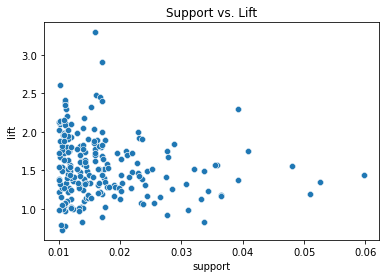

In [11]:
sns.scatterplot(data = rules, x = 'support', y = 'lift').set(Title= 'Support vs. Lift')

### Generate the Association Rules of the frequent itemsets found by the Apriori Algorithm with another confidence threshold

In [12]:
rules = association_rules(frequent_itemsets,
                         metric = 'confidence',
                         min_threshold = 0.15)
print(rules.shape)
rules

(229, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255
1,(10ft iPHone Charger Cable 2 Pack),(HP 61 ink),0.050527,0.163845,0.010132,0.200528,1.223888,0.001853,1.045884
2,(10ft iPHone Charger Cable 2 Pack),(Screen Mom Screen Cleaner kit),0.050527,0.129583,0.015198,0.300792,2.321232,0.008651,1.244861
3,(10ft iPHone Charger Cable 2 Pack),(VIVO Dual LCD Monitor Desk mount),0.050527,0.174110,0.014265,0.282322,1.621513,0.005468,1.150780
4,(3A USB Type C Cable 3 pack 6FT),(Dust-Off Compressed Gas 2 pack),0.042528,0.238368,0.017064,0.401254,1.683336,0.006927,1.272045
...,...,...,...,...,...,...,...,...,...
224,"(USB 2.0 Printer cable, VIVO Dual LCD Monitor ...",(Dust-Off Compressed Gas 2 pack),0.027596,0.238368,0.010132,0.367150,1.540263,0.003554,1.203494
225,"(Dust-Off Compressed Gas 2 pack, VIVO Dual LCD...",(USB 2.0 Printer cable),0.059725,0.170911,0.010132,0.169643,0.992583,-0.000076,0.998473
226,"(Screen Mom Screen Cleaner kit, HP 61 ink)",(VIVO Dual LCD Monitor Desk mount),0.032129,0.174110,0.010932,0.340249,1.954217,0.005338,1.251821
227,"(HP 61 ink, VIVO Dual LCD Monitor Desk mount)",(Screen Mom Screen Cleaner kit),0.039195,0.129583,0.010932,0.278912,2.152382,0.005853,1.207088


### Further scrutinize the Association Rules by adding a threshold of 2.5 for Lift

In [13]:
rules = rules[rules['lift']>2.5]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
149,(SanDisk Ultra 64GB card),(SanDisk 128GB Ultra microSDXC card),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410
150,(SanDisk 128GB Ultra microSDXC card),(SanDisk Ultra 64GB card),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860
192,"(Dust-Off Compressed Gas 2 pack, VIVO Dual LCD...",(FEIYOLD Blue light Blocking Glasses),0.059725,0.065858,0.010265,0.171875,2.609786,0.006332,1.128021
194,(FEIYOLD Blue light Blocking Glasses),"(Dust-Off Compressed Gas 2 pack, VIVO Dual LCD...",0.065858,0.059725,0.010265,0.155870,2.609786,0.006332,1.113898
214,"(Dust-Off Compressed Gas 2 pack, VIVO Dual LCD...",(SanDisk Ultra 64GB card),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445
216,(SanDisk Ultra 64GB card),"(Dust-Off Compressed Gas 2 pack, VIVO Dual LCD...",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902


### Plot the support vs lift and confidence of our association rules

<ipython-input-14-269a331a09a2>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.scatterplot(data = rules, x = 'support', y = 'lift', ax = ax1).set(Title= 'Support vs. Lift')
<ipython-input-14-269a331a09a2>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.scatterplot(data = rules, x = 'support', y = 'confidence', ax = ax2).set(Title = 'Support vs. Confidence')


[Text(0.5, 1.0, 'Support vs. Confidence')]

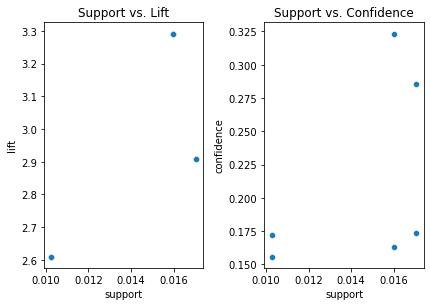

In [14]:
fig, (ax1,ax2)  = plt.subplots(ncols = 2, sharey = False)
fig.tight_layout(w_pad = 3)
sns.scatterplot(data = rules, x = 'support', y = 'lift', ax = ax1).set(Title= 'Support vs. Lift')
sns.scatterplot(data = rules, x = 'support', y = 'confidence', ax = ax2).set(Title = 'Support vs. Confidence')

### Identify the top three rules from our association rules

In [15]:
rules.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
149,(SanDisk Ultra 64GB card),(SanDisk 128GB Ultra microSDXC card),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410
150,(SanDisk 128GB Ultra microSDXC card),(SanDisk Ultra 64GB card),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860
192,"(Dust-Off Compressed Gas 2 pack, VIVO Dual LCD...",(FEIYOLD Blue light Blocking Glasses),0.059725,0.065858,0.010265,0.171875,2.609786,0.006332,1.128021


### Support, Confidence, and Lift of our top three rules

In [16]:
rules[['antecedents','consequents','support','confidence','lift']].head(3)

,antecedents,consequents,support,confidence,lift
149,(SanDisk Ultra 64GB card),(SanDisk 128GB Ultra microSDXC card),0.015998,0.162822,3.291994
150,(SanDisk 128GB Ultra microSDXC card),(SanDisk Ultra 64GB card),0.015998,0.323450,3.291994
192,"(Dust-Off Compressed Gas 2 pack, VIVO Dual LCD...",(FEIYOLD Blue light Blocking Glasses),0.010265,0.171875,2.609786
